# SciPy Optimize Global

## Global Optimization

In [1]:
# Importing the packages for the example
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))



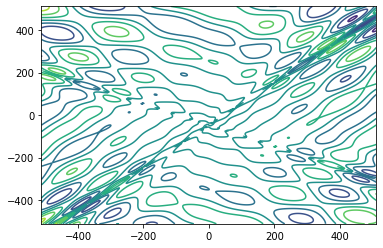

In [7]:
fig, ax = plt.subplots()
ax.contour(xgrid,ygrid,eggholder(xy))

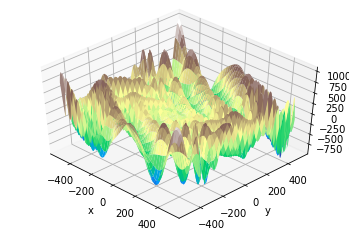

In [3]:
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [4]:
bounds = [(-512, 512), (-512, 512)]
optimize.shgo(eggholder,bounds)

     fun: -935.3379515605128
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 2
   nlfev: 50
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097806, 453.97741934])
      xl: array([[439.48097806, 453.97741934]])